#  Tech Giants Stock  Data Analysis [ED]

## About the Author 
Hi, I'm **FIJABI J. ADEKUNLE**, an independent data Analyst with a unique background in Marine Engineering. 
- My expertise lies in applying data-driven insights to solve complex problems, particularly in the maritime & Stock Market industries.
Having transitioned into the data field, I combine my hands-on engineering experience with analytical skills to explore meaningful trends and patterns in data.

In this comprehensive project, I leveraged advanced analytical skills to uncover meaningful trends and patterns in the stock prices and performance of seven tech giants, including:
- GOOGL (Google)
- META (Meta)
- MSFT (Microsoft)
- AAPL (Apple)
- TSLA (Tesla)
- AMZN (Amazon)
- ORCL (Oracle)

Through an exhaustive exploratory data analysis (EDA), I revealed valuable insights and derived actionable recommendations for stakeholders. Let's navigate the EDA notebook together to uncover the fascinating trends and patterns that emerged from this analysis.

## Project Introduction 
#### Title: Exploring the Tech Giants: *A Deep Dive into Stock Market Trends*

This project conducts an in-depth analysis of the stock performance of seven tech giants, namely Google, Meta, Microsoft, Apple, Tesla, Amazon, and Oracle, from January 2nd, 2020 to December 28th, 2023. The dataset, extracted using the yfinance Python library, comprises the following columns:
Original Columns:
- Date: The date of the stock price data.
- Open: The opening price of the stock on that date.
- High: The highest price of the stock on that date.
- Low: The lowest price of the stock on that date.
- Close: The closing price of the stock on that date.
- Adj Close: The adjusted closing price of the stock on that date.
- Volume: The number of shares traded on that date.
- Ticker: The stock ticker symbol of the company.
   
**Calculated Columns:** 
- pct_change: The percentage change in the stock price from the previous day.
- cumulative return: The cumulative return on investment (ROI) over time.
- moving_avg_7D: The 7-day moving average of the stock price.
- moving_avg_30D: The 30-day moving average of the stock price.

- This analysis aims to uncover trends, patterns, and insights into the stock performance of these tech giants, providing valuable information for investors and stakeholders. stakeholders.





In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/kaggle/input/tech-giants-stock-market-data-raw/Tech Giants Stock Market Data (Raw).csv')
# Checking first few rows of dataset 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.796013,135480400,AAPL
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.088310,146322800,AAPL
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.662720,118387200,AAPL
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.320992,108872000,AAPL
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.484360,132079200,AAPL


In [2]:
# Checking datatypes 
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Ticker        object
dtype: object

In [3]:
# Let's convert Date to datetime 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [4]:
# Adding more relevant columns 
# Let's sort the dataset by date 
df.sort_values(by=['Date', 'Ticker'], inplace=True) 

# Let's calculate Percentage Change
df['pct_change'] = df.groupby('Ticker')['Close'].pct_change() * 100

# Calculating Cumulative Returns
df['cumulative return']  = df.groupby('Ticker')['Close'].apply(lambda x:x / x.iloc[0]).reset_index(level=0, drop=True)

# Calculating 7-day and 30-day Moving Averages
df['moving_avg_7D'] = (
    df.groupby('Ticker')['Close']
    .rolling(window=7)
    .mean()
    .reset_index(level=0, drop=True)
)

df['moving_avg_30D'] = (
    df.groupby('Ticker')['Close']
    .rolling(window=30)
    .mean()
    .reset_index(level=0, drop=True)
)



In [5]:
# Saving the newly created dataset
# df.to_csv('Tech Giants Stock Market Data (Processed).csv')

## Basic Checks & Data Cleaning

In [6]:
def explore_tech_data(df):
    # This function provides an Overview of the Tech Giants Stock Market Dataset
    print('Dataset Overview: ')
    
    print(f"Number of Rows: {df.shape[0]}")
    print(f"Number of Columns: {df.shape[1]}")
    
    print('\n  Columns Names: ' )
    print(df.columns.tolist())
    
    print('\n Datatypes & Non-Null values')
    print(df.info())
    
    print('\nStatistics Summary')
    print(df.describe(include='all').T)
    
    print('\nColumns With Null Values')
    null_counts = df.isnull().sum()
    if null_counts[null_counts > 0].empty: 
        print('No missing Values detected')
    else:
        print(null_counts[null_counts > 0])

    return

In [7]:
explore_tech_data(df)

Dataset Overview: 
Number of Rows: 7042
Number of Columns: 12

  Columns Names: 
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Ticker', 'pct_change', 'cumulative return', 'moving_avg_7D', 'moving_avg_30D']

 Datatypes & Non-Null values
<class 'pandas.core.frame.DataFrame'>
Index: 7042 entries, 6036 to 5029
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               7042 non-null   datetime64[ns]
 1   Open               7042 non-null   float64       
 2   High               7042 non-null   float64       
 3   Low                7042 non-null   float64       
 4   Close              7042 non-null   float64       
 5   Adj Close          7042 non-null   float64       
 6   Volume             7042 non-null   int64         
 7   Ticker             7042 non-null   object        
 8   pct_change         7035 non-null   float64       
 9   cumulative return  7042 non-nu

### Insights From Basic Checks

1. The dataset shape:
  - Columns: 7042 
  - Rows: 12
2. Key Columns:
  - Financial data:  (Open, High, Low, Close, Adj Close)
  - Technical Indicators: (pct_change, cumulative return, moving_avg_7D, moving_avg_30D)
  - Meta Information: (Date, Ticker, Volume)
3. Null Values:  Three Columns have missing data-
   - pct_change: 7
   - moving_avg_7D: 42
   - moving_avg_30D: 203
4. Date Range:
  - The Dataset spans from January 2, 2022 to December 29, 2023, providing nearly 4 years data.
5. Unique Tickers:
   - 7 Unique Tickers present in the dataset, META having the highest frequency (1006 occurances)
6. Volume Insights:
   - The average Volume is approximately  58,352,531 Million but has a significant range with
minimum of  approximately  2,168,200 Million and maximum of approximately 914,082,000 Million trading volumes
7. Stock Price Summary:
The Open, Close, High & Low prices varies significantly with
   - Minimum: $24.98
   - Maximun: $411.47
8. Technical Indicator Trends:
   - pct_change (percentage change in stock price) ranges from -26.39% to +23.28%, with a mean of approximately 0.13%.
   - cumulative return indicates long-term gains, averaging 2.35 across the dataset.
9. Moving Averages:
   -  The moving_avg_7D and moving_avg_30D columns suggest the dataset includes short- and long-term trends, with respective averages of 169.51 and 169.69.

### Handling Missing Values 
- We are dropping rows with missing data
- Reason:
  - The null values in your dataset arise due to the moving averages and pct_change calculations which depend on prior data points. These are expected and typically only occur at the start of the dataset for each ticker.



In [8]:
# Let drop the rows with missing data 
df = df.dropna()
# Confirming missing value dropped 
df.isnull().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Ticker               0
pct_change           0
cumulative return    0
moving_avg_7D        0
moving_avg_30D       0
dtype: int64

### Exploratory Data Analysis [EDA]

#### Univariant Analysis

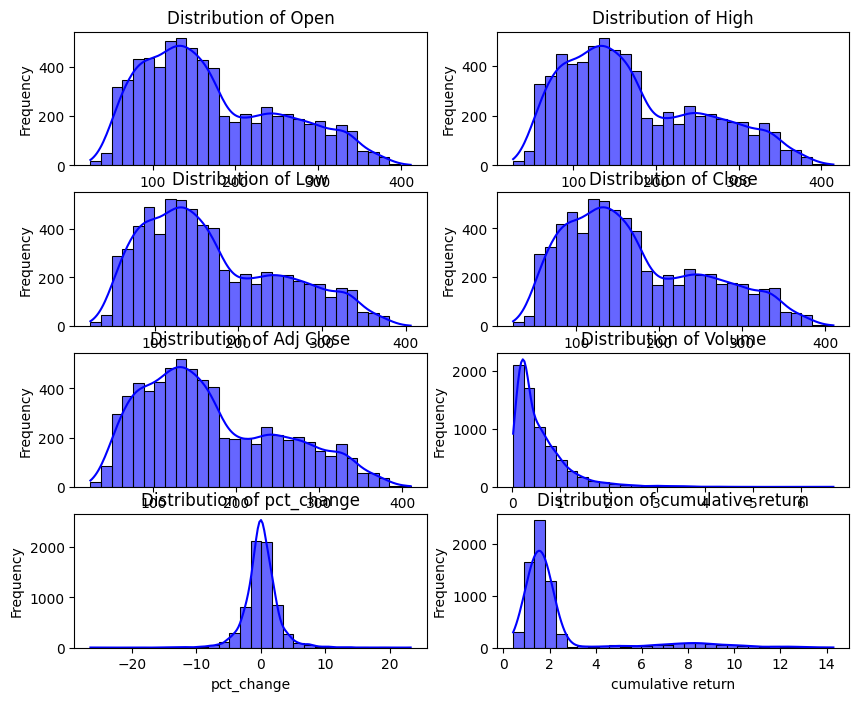

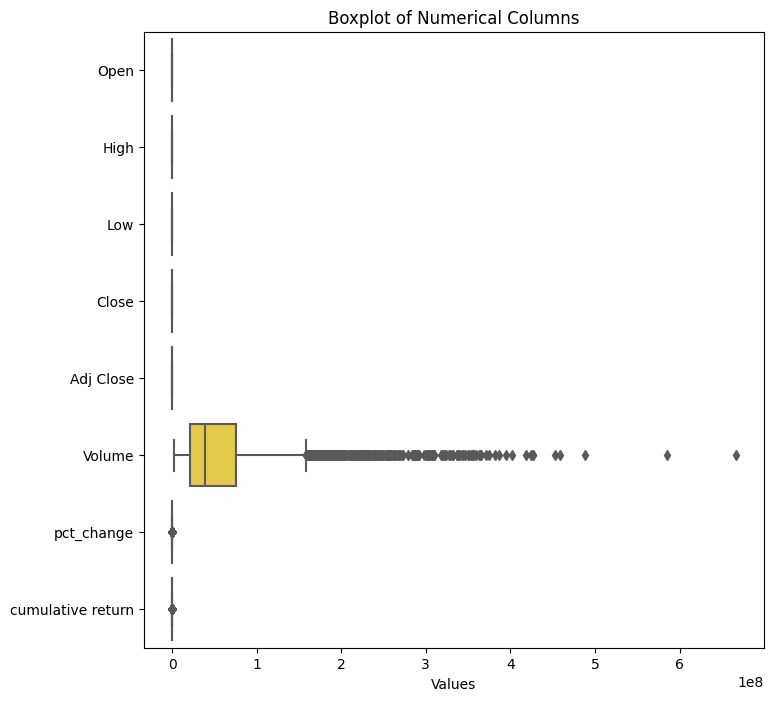

In [9]:
# Defining the numerical columns for distribution analysis
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'pct_change', 'cumulative return']

# Set the figure size for the plots
plt.figure(figsize=(10, 8))

# Looping through each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)  # Create subplots 
    sns.histplot(df[column], kde=True, bins=30, color='blue', alpha=0.6)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout
plt.savefig('Distribution of Numerical Columns')
plt.show()

# Boxplot for numerical columns to identify outliers
plt.figure(figsize=(8, 8))
sns.boxplot(data=df[numerical_columns], orient='h', palette='Set2')
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Values')
plt.savefig('Boxplot of Numerical Columns')
plt.show()


<Axes: xlabel='Ticker', ylabel='Close'>

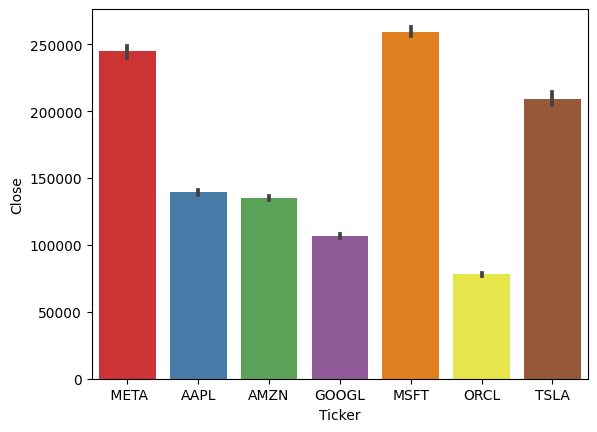

In [10]:
sns.barplot(df, x='Ticker', y='Close', estimator=sum, palette='Set1')

#### Stock Price Trends by Tickers

In [11]:
# Let's plot Stock Price Trends
fig = px.line(
    df, 
    x='Date', 
    y='Close', 
    color='Ticker', 
    title='Interactive Stock Price Trends by Ticker',
    labels={'Close': 'Close Price', 'Date': 'Date'},  # Axis labels
    template='plotly_white'  # Clean template
)

# Update the layout for better visualization
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend_title='Ticker',
    hovermode='x unified',  # Unified hover tool
    font=dict(size=12)
)

fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="center", x=0.5))

# Display the interactive plot
fig.show()


#### Returns Analysis
- Daily Percentage Change

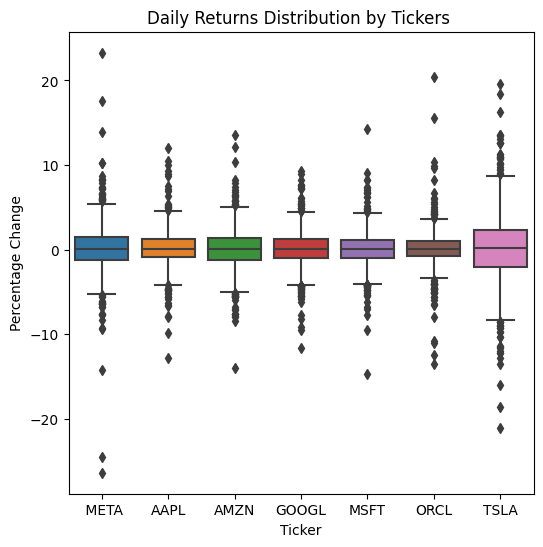

In [12]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='Ticker', y='pct_change')
plt.title('Daily Returns Distribution by Tickers ')
plt.xlabel('Ticker')
plt.ylabel('Percentage Change')
plt.savefig('Daily Returns Distribution by Tickers')
plt.show()

#### Moving Averges 
- Analyzing Trends with 7-day & 30-day Moving Averages

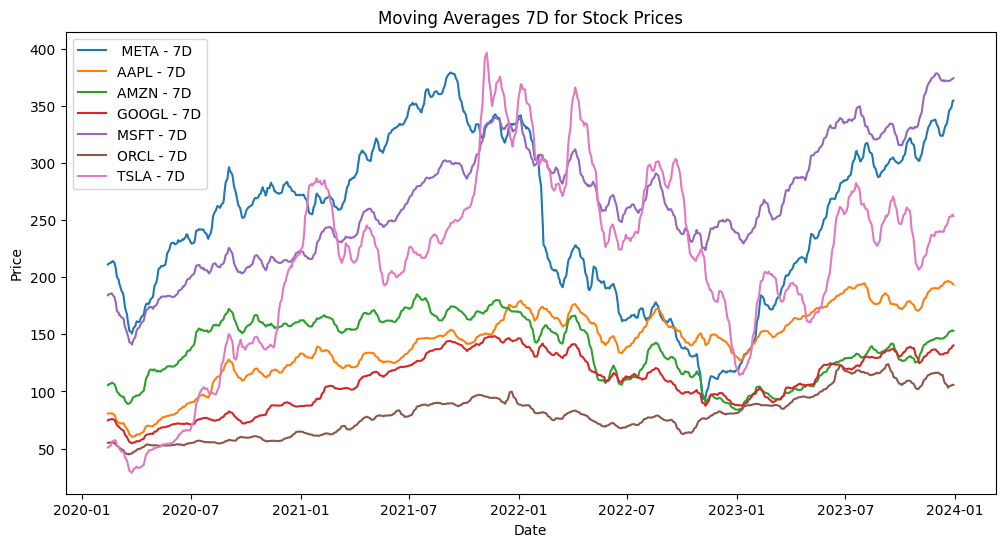

In [13]:
# Plotting Moving Averages for 'Close'
plt.figure(figsize=(12, 6))
for ticker in df['Ticker'].unique():
    data_subset = df[df['Ticker'] == ticker]
    plt.plot(data_subset['Date'], data_subset['moving_avg_7D'], label=f'{ticker} - 7D')

plt.title("Moving Averages 7D for Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.savefig('Moving Averages 7D.PNG')
plt.show()


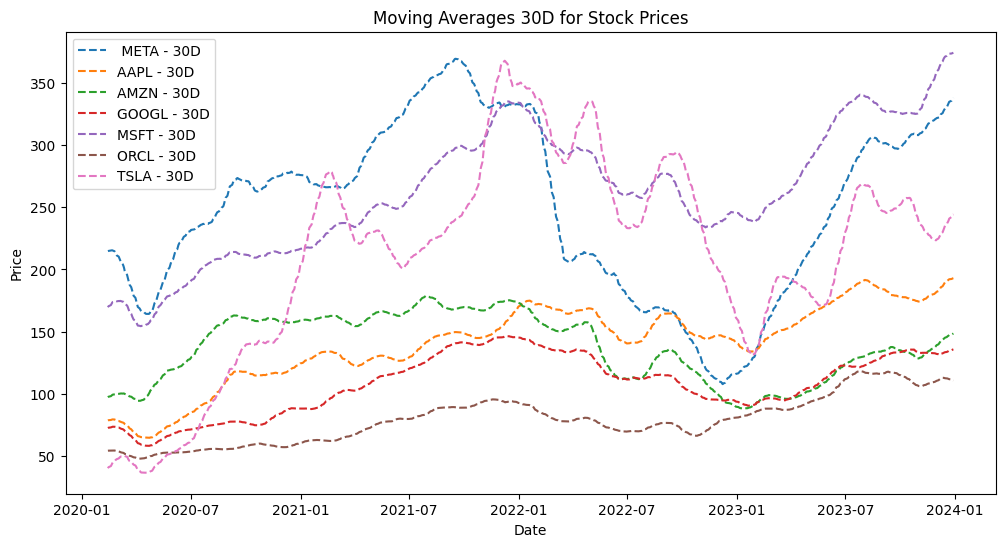

In [14]:
# Moving Averages for 30D 
# Plotting Moving Averages for 'Close'
plt.figure(figsize=(12, 6))
for ticker in df['Ticker'].unique():
    data_subset = df[df['Ticker'] == ticker]
    plt.plot(data_subset['Date'], data_subset['moving_avg_30D'], linestyle='--', label=f'{ticker} - 30D')

plt.title("Moving Averages 30D for Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.savefig("Moving Averages 30D for Stock Prices.PNG")
plt.show()


#### Cumulative Returns

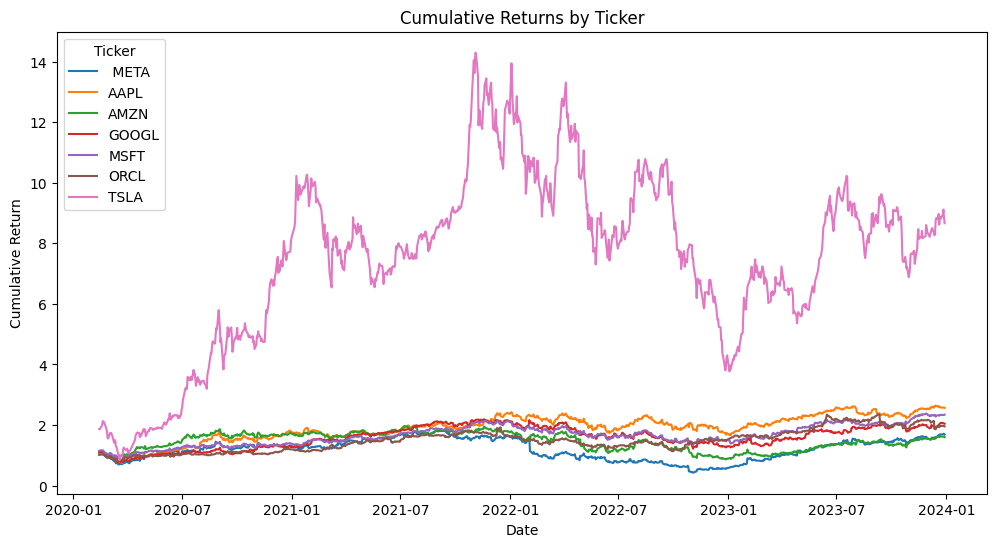

In [15]:
# Line chart for cumulative returns
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='cumulative return', hue='Ticker')
plt.title("Cumulative Returns by Ticker")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend(title="Ticker")
plt.savefig("Cumulative Returns by Ticker.png")
plt.show()

#### Volume Analysis 
- Examining the Trading Volume for each Stock 

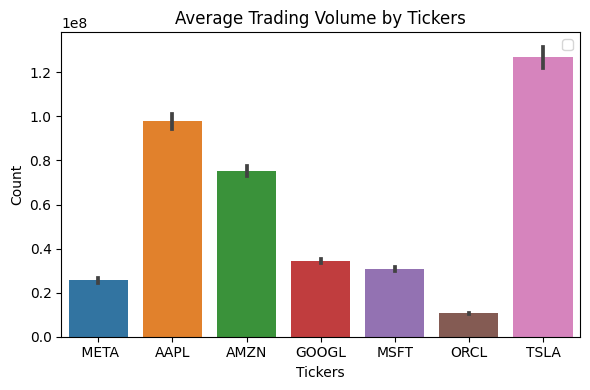

In [16]:
plt.figure(figsize=(6,4))
sns.barplot(df, x='Ticker', y='Volume', estimator='mean')
plt.xlabel('Tickers')
plt.ylabel('Count')
plt.title('Average Trading Volume by Tickers')
plt.legend()
plt.tight_layout()
plt.savefig('Average Trading Volume by Tickers')
plt.show()

#### Correlation Analysis 
- Understanding Relationships between Stock Prices

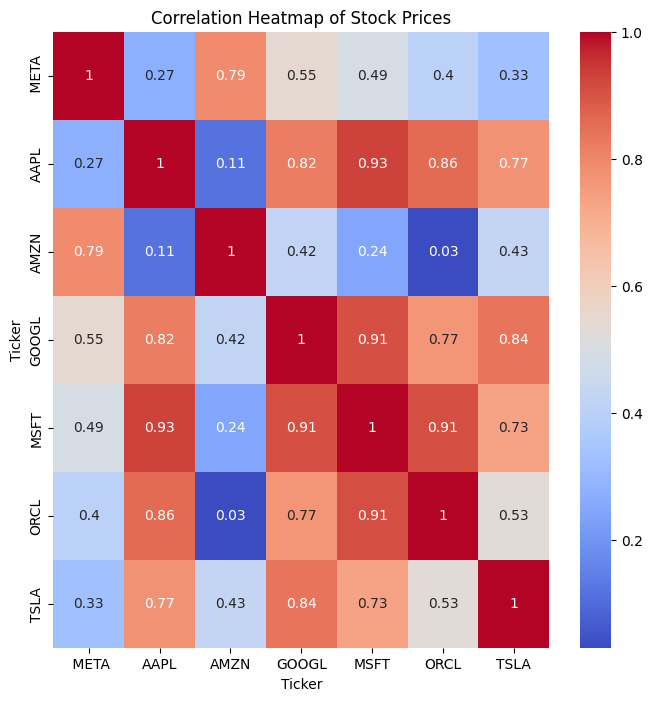

In [17]:
# Let's pivot data for correlation matrix 
price_pivot = df.pivot(index='Date', columns='Ticker', values='Close') 
plt.figure(figsize=(8,8))
sns.heatmap(price_pivot.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Stock Prices')
plt.savefig('Correlation Heatmap of Stock Prices.jpg')
plt.show()

## Insight from EDA

#### Average Trading Volume by Tickers
##### Statistical Insights:
- TSLA has the highest mean trading volume, suggesting it is the most actively traded stock among the selected tickers.
- AAPL and AMZN follow closely, reinforcing their strong market presence.
- ORCL has the lowest trading volume, indicating less market activity compared to other tech giants.
*The error bars suggest variability in trading volume—stocks with higher error bars (TSLA, AAPL) may experience significant fluctuations in trading volume.*

#### Boxplot of Numerical Columns
##### Statistical Insights:
- Volume has extreme outliers, which could indicate occasional trading spikes.
Most other variables (Open, High, Low, Close, Adj Close) are tightly clustered, suggesting stable price movements for these stocks.
- pct_change and cumulative return show significant outliers, which may indicate rare but impactful price fluctuations.

####  Correlation Heatmap of Stock Prices
##### Statistical Insights:
- Strong correlations (>0.9) between MSFT, GOOGL, and ORCL suggest they move together in the market.
- AAPL shows a high correlation with MSFT (0.93), GOOGL (0.82), and ORCL (0.86), meaning they are likely influenced by similar factors (e.g., tech industry trends).
- AMZN has weak correlations with most other stocks (except META at 0.79), implying its stock movements are somewhat independent.
- TSLA is moderately correlated with other stocks (~0.5-0.8), meaning it reacts differently to market forces.

#### Daily Returns Distribution by Tickers
#### Statistical Insights:
- TSLA has the widest spread, indicating it is the most volatile stock.
- All stocks have returns centered around zero, meaning no consistent upward/downward bias.
- Presence of extreme outliers suggests high-risk trading days.


#### Cumulative Returns by Ticker
- Observation:
- Tesla (TSLA) has shown significantly higher cumulative returns compared to other stocks.
- The cumulative return for TSLA peaked around late 2021 and early 2022 before experiencing sharp declines.
- Other stocks, such as AAPL, AMZN, GOOGL, MSFT, ORCL, and META, have more stable growth, with returns generally ranging between 1x and 3x.
- META (Facebook) experienced a dip around early 2022, likely due to market challenges and business restructuring.
##### Statistical Insights:
- TSLA was highly volatile, showing extreme growth but also steep corrections.
Most tech stocks showed positive cumulative returns but at a much lower scale compared to Tesla.
- The 2022 period appears to have been a turning point, possibly due to macroeconomic factors like rising interest rates or industry shifts.
#### Moving Averages (7-Day) for Stock Prices
- Observation:
- MSFT and META have seen the most significant stock price growth since 2020.
- TSLA had a rapid increase in stock price in 2021, similar to its cumulative returns, but faced fluctuations afterward.
- AAPL and GOOGL showed steady growth, reflecting their strong market position and stability.
- META had a major dip in early 2022, consistent with the challenges it faced in the digital advertising industry.
- AMZN and ORCL had relatively modest but consistent growth.
##### Statistical Insights:
- The moving averages help smooth out daily fluctuations, showing that META, TSLA, and MSFT experienced the highest volatility.
- Tesla’s stock price fluctuations mirror its cumulative returns, indicating speculative investor activity.
- AAPL and GOOGL appear to be more stable compared to others, making them relatively safer long-term bets.
  
#### Moving Averages (30-Day) for Stock Prices
- Observation:
- The trends are similar to the 7-day moving averages, but with smoother fluctuations.
- The long-term trend still shows TSLA, MSFT, and META experiencing the largest movements.
- META’s sharp drop in 2022 is more pronounced here, reflecting a long-term decline rather than just short-term volatility.
- GOOGL, AMZN, and ORCL maintained steady growth without significant drops.
##### Statistical Insights:
- The 30-day moving average is useful for identifying long-term trends rather than short-term fluctuations.
- META’s long-term dip in early 2022 indicates a significant event (possibly earnings reports, business shifts, or regulatory concerns).
- TSLA's stock saw aggressive movement, confirming its high-risk, high-reward nature.
- MSFT and AAPL maintain long-term strength, proving their resilience in the tech sector.

### Summary of Key Findings:
- TSLA is the most volatile stock, both in trading volume and daily returns, making it highly sensitive to market sentiment.
- AAPL, MSFT, and GOOGL show strong correlation, indicating that they respond similarly to market trends, possibly due to overlapping investor sentiment.
- AMZN exhibits independent price behavior, suggesting that its performance is influenced by factors distinct from the broader tech sector.
- Outliers in trading volume and price returns highlight periods of heightened market activity, which could be linked to earnings reports, economic events, or major company announcements.
- The distribution of stock returns may not be normal, suggesting the need for alternative statistical models like log returns or non-parametric tests for deeper risk assessment
### Recommendations
- Tesla (TSLA): High volatility makes it ideal for short-term traders but risky for long-term investors. Consider **risk-mitigation** strategies such as stop-loss orders.
- META: A sharp decline in 2022 followed by a strong recovery suggests that investors should analyze growth catalysts like AI advancements or advertising revenue trends before making long-term decisions.
- MSFT & AAPL: These stocks provide steady, long-term growth, making them suitable for conservative investors or portfolio diversification.
- GOOGLE (GOOGL): Moves closely with AAPL and MSFT, indicating strong alignment with overall tech market trends. Its advertising revenue and cloud segment growth should be key considerations for investors.
- Amazon (AMZN): Shows more independent price behavior, suggesting that factors like e-commerce growth, AWS performance, and consumer spending trends play a crucial role. Investors should monitor macroeconomic conditions that impact consumer demand and logistics costs.
- Moving Averages: The 7-day trend is valuable for identifying short-term entry and exit points, while the 30-day average provides a smoother signal for long-term trend confirmation.
- Macroeconomic Impact: The 2022 decline aligns with inflation fears, interest rate hikes, and recession concerns. Future analyses could incorporate macro indicators (e.g., Federal Reserve policy, inflation rates) to predict similar trends.

### Future Analyses:
- Risk-adjusted returns analysis (e.g., Sharpe ratio) to assess risk vs. reward.
- Correlation matrix for broader market comparison to see if these stocks move with major indices (e.g., S&P 500).
- Sentiment analysis of news & earnings reports to check how market sentiment impacts stock trends.
- Machine learning-based forecasting models to predict stock trends based on historical data.

### Call to Action 

